## Numerical Homework 3


##Objectives
1. You will learn about how to calculate optical contants from Drude model
2. In reverse, you will learn how to extract Drude material parameters from the experimental optical constants.

In [2]:
#first import all necessary libraries
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.constants as cnst
from scipy.optimize import leastsq

#Drude Model

In [3]:
def sigmaDrude(freq,plasmaFreq,gamma):
    omega = 2*cnst.pi*freq
    return cnst.epsilon_0*plasmaFreq**2/(gamma-1j*omega)

def sigmaToEpsilon(freq,sigma):
    omega = 2*cnst.pi*freq
    return cnst.epsilon_0+ 1j*sigma/omega

def epsilonToRefractiveIndex(freq,epsilon):
    return cnst.c*np.sqrt(cnst.mu_0*epsilon)

def reflectivity(freq,n):
    return abs(((1-n)/(1+n))**2)

##Physics Explaination
Here we use the Drude model expressin derived the class to calculate conductivity $\tilde{\sigma}$.  The rest are the conversion. We use the following route $(\omega_p,\Gamma) \rightarrow \tilde{\sigma} \rightarrow \tilde{\epsilon} \rightarrow \tilde{n} \rightarrow R$

Python offers an easy way to access the physical constants from ```import scipy.constants as cnst```. See that we could easily pull out numbers of $\mu_0$ as ```cnst.mu_0```, $\epsilon_0$ as ```cnst.epsilon_0``` and $\pi$ as ```cnst.pi``` etc.


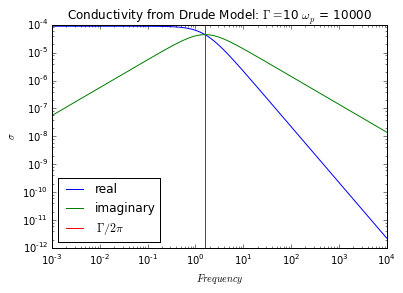

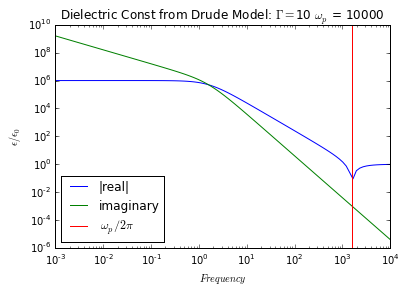

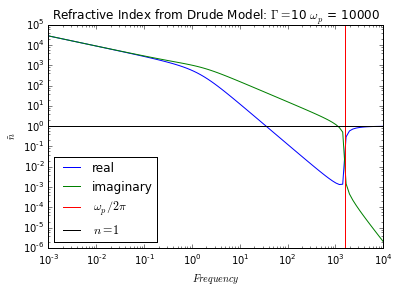

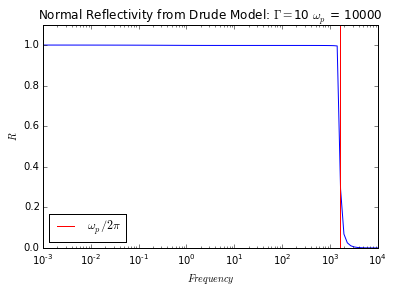

In [4]:
omegap = 10**4
gamma = 10
f = np.logspace(-3, 4,100)
sigma=sigmaDrude(f,omegap,gamma)
epsilon = sigmaToEpsilon(f, sigma)
refractiveIndex = epsilonToRefractiveIndex(f,epsilon)
R =  reflectivity(f,refractiveIndex)

ax = plt.subplot(111)
ax.loglog(f,sigma.real,label="real")
ax.loglog(f,sigma.imag,label="imaginary")
ax.axvline(x=gamma/(2*np.pi), color='r',label='$\Gamma/2\pi$')
ax.set_ylabel('$\sigma$')
ax.set_xlabel('$Frequency$')
ax.set_title("Conductivity from Drude Model: $\Gamma = $" + str(gamma) + " $\omega_p$ = " + str(omegap))
plt.legend(loc='lower left')
plt.savefig("Drude_sigma.pdf")
plt.show()

fig = plt.figure()
ax = plt.subplot()
ax.loglog(f,abs(epsilon.real)/cnst.epsilon_0,label="|real|")
ax.loglog(f,epsilon.imag/cnst.epsilon_0,label="imaginary")
ax.axvline(x=omegap/(2*np.pi), color='r',label='$\omega_p/2\pi$')
ax.set_ylabel('$\epsilon/\epsilon_0$')
ax.set_xlabel('$Frequency$')
ax.set_title("Dielectric Const from Drude Model: $\Gamma = $" + str(gamma) + " $\omega_p$ = " + str(omegap))
plt.legend(loc='best')
plt.savefig("Drude_epsilon.pdf")
plt.show()

fig = plt.figure()
ax = plt.subplot()
ax.loglog(f,refractiveIndex.real,label="real")
ax.loglog(f,refractiveIndex.imag,label="imaginary")
ax.axvline(x=omegap/(2*np.pi), color='r',label='$\omega_p/2\pi$')
ax.axhline(y=1, color='k',label='$n=1$')
ax.set_ylabel(r'$\tilde{n}$')
ax.set_xlabel('$Frequency$')
ax.set_title("Refractive Index from Drude Model: $\Gamma = $" + str(gamma) + " $\omega_p$ = " + str(omegap))
plt.legend(loc='best')
plt.savefig("Drude_n.pdf")
plt.show()

fig = plt.figure()
ax = plt.subplot()
ax.semilogx(f,R)
ax.axvline(x=omegap/(2*np.pi), color='r',label='$\omega_p/2\pi$')
ax.set_ylabel(r'$R$')
ax.set_xlabel('$Frequency$')
ax.set_title("Normal Reflectivity from Drude Model: $\Gamma = $" + str(gamma) + " $\omega_p$ = " + str(omegap))
ax.set_ylim(0,1.1)
plt.legend(loc='best')
plt.savefig("Drude_R.pdf")
plt.show()

##Program Explaination
There is noting special about the excution of the plots. Here are new feature that we havn't talked about

1. ```np.logspace(-3, 4,100)``` is a log scale analog of ```np.linespace(10**-3, 10**4,100)```. It create an equal sampling of 100 points in log-based-10 scale from 10$^{-3}$ to 10$^{4}$ Hz.

2. ```ax.axvline(x=omegap/(2*np.pi))``` adds a vertical line at the x poistion that you like.


#Drude Model in Silver

It is more realistic to do the inverse since we normally measure the parameters like refractive indexes and perform a ***curve fitting*** to extract the Drude parameters. The Drude parameters then will tell you about the carrier density $N$ and the mobility $\mu$. These two parameters are the useful parameters for material physicists.

Below I'll use the refractive index  data from Ag from 
http://www.filmetrics.com/refractive-index-database/Au/Gold

Here are the steps to do this.

##1. Load the data from file

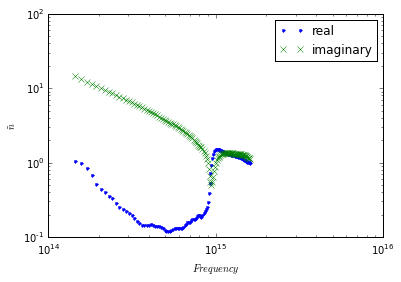

In [13]:
file_to_read = open('Ag.txt','r')
content = file_to_read.read()
wavelength = []
n = []
k = []

for line in content.split('\n')[1:-1]:
    x,y,z =  line.split('\t')
    wavelength.append(float(x))
    n.append(float(y))
    k.append(float(z))

wavelength_in_nm = np.array(wavelength)
n = np.array(n)
k = np.array(k)
nExp = n + 1j*k

f = cnst.c/(wavelength_in_nm*1e-9)
fig = plt.figure()
ax = plt.subplot()
ax.loglog(f,n,'.',label='real')
ax.loglog(f,k,'x',label='imaginary')
ax.set_ylabel(r'$\tilde{n}$')
ax.set_xlabel('$Frequency$')
plt.legend()
plt.show()

##Program Explaination (Tricky one)

1. The openning

    ```
    file_to_read = open('Ag.txt','r')
    content = file_to_read.read()
    ``` 
    tells python that you want to open up the file ```Ag.txt```. Once this's done the entire data will be kept in the ```content``` variable. 
 
2. But the ```content``` so far is useless, the data are so interconntected by whiespace charater such as ```\n``` or ```\t``` which tell the computer to start a new line or make tab.

    The ```content``` is
    
    ```
 \xef\xbb\xbfWavelength(nm)\tn\tk\r\r\n187.88\t0.995\t1.13\r\r\n189.31\t1.0043\t1.1494\r\r\n190.77\t1.012\t1.16\r\r\n192.25\t1.0195 ...
    ```

3. To fix, we have to call ```content.split('\n')``` method. It will look for ```\n```. Take them out and sort the fial results into a list (i.e. the [] thing with commas).

    The ```content``` becomes
    
    ```
    ['\xef\xbb\xbfWavelength(nm)\tn\tk\r\r',
 '187.88\t0.995\t1.13\r\r',
 '189.31\t1.0043\t1.1494\r\r',
 '190.77\t1.012\t1.16\r\r',
 '192.25\t1.0195\t1.1681\r\r',
 '193.75\t1.028\t1.18\r\r',
 '195.28\t1.0375\t1.1944\r\r',
 '196.83\t1.048\t1.21\r\r', ...
     ```

4. Then we do a for loop over this list

    ```
     for line in content.split('\n')[1:-1]:
         x,y,z =  line.split('\t')
         wavelength.append(float(x))
         n.append(float(y))
         k.append(float(z))
     ```

    i.e. in each element in the ```content``` list we take them out and run another ```split``` but this time aims for the tabs ```\t```.

    We also do a cool trick in Python called **Multiple Unpacking Assignment**. which is equivalent to 

    ```
        x = line.split('\t')[0]
        y = line.split('\t')[1]
        z = line.split('\t')[2]
    ```
   
    This saves 2 lines of coding. After this we append the data into lists of  wavelength n and k. 
    
    **Note** You can't call any variable ```lambda``` in Python. It's reserved for other purposes

5. Then convert list into numpy array, which is easier to handle:
    ```
    wavelength_in_nm = np.array(wavelength)
    n = np.array(n)
    k = np.array(k)
    ```

6. We also defin a complex refractive index $\tilde{n}$ for future uses. In python ```1j``` represents the complex number i.
    ```
    nExp = n + 1j*k
    ```
7. Don't forget that we loves the frequency unity.  So we need to convert the wavelength in nm to Hz.

    ```
    f = cnst.c/(wavelength_in_nm*1e-9)
    ```
8. Finally, nothing surprising, just doing the log-log plot.
    ```
    ax.loglog(f,n,'.',label='real')
    ```

In [14]:
def funcToFit(freq, omegap,gamma):
     return epsilonToRefractiveIndex(freq,(sigmaToEpsilon(freq,sigmaDrude(freq,omegap,gamma))))

def residuals(params, freq, nExp):
    omegap, gamma = params
    diff = funcToFit(freq, omegap,gamma) - nExp
    return np.sqrt(diff.real**2+diff.imag**2)

##Program Explaination 
1. We are now ready to do the curvefit. But first we have to prepare a bit.
2. I've define a ```funcToFit``` as the model y=f(x) that we want to fit the to the experimental data (i.e. y_i at x_i at many points) -- in our case we have downloded this from internet. 
    ```
    def funcToFit(freq, omegap,gamma):
         return epsilonToRefractiveIndex(freq,(sigmaToEpsilon(freq,sigmaDrude(freq,omegap,gamma))))
     ```
    
    The function is built from what we have defined eariler starting with the sigma from Drude model and ending with the refractivie index.
  
3. Next we have to define a ```residuals``` function that calulate the difference between the model and the data. We want to find the parameters that minimize this number.
    First, the ```params``` keeps the to parameters of the fit i.e. ```omegap``` and ```gamma``` 
    ```
    omegap, gamma = params
    ```
    Next, we calculate the difference between our model (by giving any set of  parameters) and the experimental data.
    ```
    diff = funcToFit(freq, omegap,gamma) - nExp
    ```
4. And we ```return``` the absolute square of the real an the imaginary part
    ```
    return np.sqrt(diff.real**2+diff.imag**2)
    ```
    This is necessary for our current case of fitting a complex model to a complex data.   

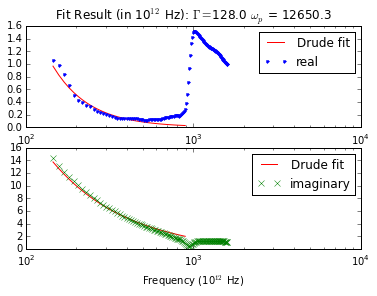

In [15]:
f_in_THz = f/1e12

#trunication
fRange = f_in_THz < 900
fTrun = f_in_THz[fRange]
nTrun = nExp[fRange]

fitResult, fitQuality = leastsq(residuals, [3000,10], args=(fTrun, nTrun))

fig = plt.figure()
ax = plt.subplot(2,1,1)
ax.semilogx(fTrun,funcToFit(fTrun,fitResult[0],fitResult[1]).real,label='Drude fit',color='r')
ax.semilogx(f_in_THz,n,'.',label='real')
ax.set_title("Fit Result (in 10$^{12}$ Hz): $\Gamma = $" + "{0:.1f}".format(fitResult[1]) + " $\omega_p$ = " + "{0:.1f}".format(fitResult[0]))
plt.legend()

ax = plt.subplot(2,1,2)
ax.semilogx(fTrun,funcToFit(fTrun,fitResult[0],fitResult[1]).imag,label='Drude fit',color='r')
ax.semilogx(f_in_THz,k,'x',label='imaginary',color='g')
ax.set_xlabel('Frequency (10$^{12}$ Hz)')
plt.legend()
plt.show()

##Program Explaination 
1. We will work with frequnecy in the unit of $10^{12}$ Hz.
    ```
    f_in_THz = f/1e12
    ```
    We want to do this becasue the frequency range (optical range) is very large ($10^{15}$ Hz). We will run into troubles if we ask the computer to calculate with all of the precision that it has.
    
    $10^{12}$ Hz is Tera-Hertz

2. Next the the **trunication**, which is one of the most important steps of the curvif fitting procedure. You don't want to fit the data to the parts where you model doesn't apply to.
    ```
    fRange = f_in_THz < 900
    fTrun = f_in_THz[fRange]
    nTrun = nExp[fRange]
    ```
    
    Here is another important python trick called **masking**

In [16]:
print "From our Drude Model Analysis"
print "Gamma is " + str(fitResult[0]/2/cnst.pi) + " x 10^12 Hz"
print "Plasma Frequency is " + str(fitResult[1]/2/cnst.pi) + " x 10^12 Hz"

From our Drude Model Analysis
Gamma is 2013.35272297 x 10^12 Hz
Plasma Frequency is 20.3764490161 x 10^12 Hz


##Homework
1. Compare to the experiment values from: http://www.wave-scattering.com/drudefit.html
    How are the results compared to the table?
2. Do a similar analysis for gold (Au.txt) or copper (Cu.txt) or Aluminum (Al.txt). Pick one that you like. Compare your result to the table.

#Lorentz Model (Plotting for the Lecture)

In [9]:
def sigmaLorentz(freq,plasmaFreq,gamma,resonanceFreq):
    omega = 2*cnst.pi*freq
    omega0 = 2*cnst.pi*resonanceFreq
    return cnst.epsilon_0*plasmaFreq**2*omega/(1j*(omega0**2-omega**2)+omega*gamma)

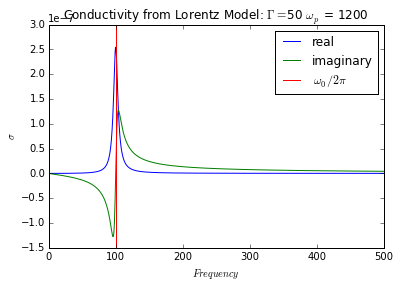

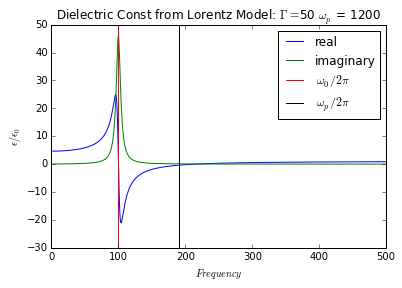

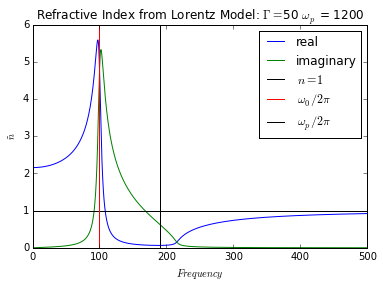

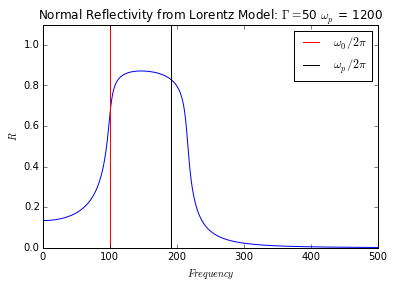

In [10]:
omegap = 1200
gamma = 50
resonanceFreq = 100
f = np.linspace(0.1, 500,1000)
sigma=sigmaLorentz(f,omegap,gamma,resonanceFreq)
epsilon = sigmaToEpsilon(f, sigma)
refractiveIndex = epsilonToRefractiveIndex(f,epsilon)
R =  reflectivity(f,refractiveIndex)

ax = plt.subplot(111)
ax.plot(f,sigma.real,label="real")
ax.plot(f,sigma.imag,label="imaginary")
ax.axvline(x=resonanceFreq, color='r',label='$\omega_0/2\pi$')
ax.set_ylabel('$\epsilon/\epsilon_0$')
ax.set_ylabel('$\sigma$')
ax.set_xlabel('$Frequency$')
ax.set_title("Conductivity from Lorentz Model: $\Gamma = $" + str(gamma) + " $\omega_p$ = " + str(omegap))
plt.legend(loc='best')
plt.savefig("Lorentz_sigma.pdf")
plt.show()

fig = plt.figure()
ax = plt.subplot()
ax.plot(f,epsilon.real/cnst.epsilon_0,label="real")
ax.plot(f,epsilon.imag/cnst.epsilon_0,label="imaginary")
ax.axvline(x=resonanceFreq, color='r',label='$\omega_0/2\pi$')
ax.axvline(x=omegap/(2*np.pi), color='k',label='$\omega_p/2\pi$')
ax.set_ylabel('$\epsilon/\epsilon_0$')
ax.set_xlabel('$Frequency$')
ax.set_title("Dielectric Const from Lorentz Model: $\Gamma = $" + str(gamma) + " $\omega_p$ = " + str(omegap))
plt.legend(loc='best')
plt.savefig("Lorentz_epsilon.pdf")
plt.show()

fig = plt.figure()
ax = plt.subplot()
ax.plot(f,refractiveIndex.real,label="real")
ax.plot(f,refractiveIndex.imag,label="imaginary")
ax.axhline(y=1, color='k',label='$n=1$')
ax.axvline(x=resonanceFreq, color='r',label='$\omega_0/2\pi$')
ax.axvline(x=omegap/(2*np.pi), color='k',label='$\omega_p/2\pi$')
ax.set_ylabel(r'$\tilde{n}$')
ax.set_xlabel('$Frequency$')
ax.set_title("Refractive Index from Lorentz Model: $\Gamma = $" + str(gamma) + " $\omega_p$ = " + str(omegap))
plt.legend(loc='best')
plt.savefig("Lorentz_n.pdf")
plt.show()

fig = plt.figure()
ax = plt.subplot()
ax.plot(f,R)
ax.axvline(x=resonanceFreq, color='r',label='$\omega_0/2\pi$')
ax.axvline(x=omegap/(2*np.pi), color='k',label='$\omega_p/2\pi$')
ax.set_ylabel(r'$R$')
ax.set_xlabel('$Frequency$')
ax.set_title("Normal Reflectivity from Lorentz Model: $\Gamma = $" + str(gamma) + " $\omega_p$ = " + str(omegap))
ax.set_ylim(0,1.1)
plt.legend(loc='best')
plt.savefig("Lorentz_R.pdf")
plt.show()